# Numerical Exercises 11: Polynomial Fit

In [2]:
from PolynomialModel import PolynomialModel
import matplotlib.pyplot as plt
import numpy as np
import os

N_Epoch = 10
N_Train = 4000              # 1000 lead to overfitting
Sigma = 0.1                 # Do not have too sparse data

model_path = "./Models/"
hist_path = "./Histories/"

In this exercise I am going to use a neural network to fit and predict data distributed on a polynomial curve, namely: $$f(x)=4-3x-2x^2+3x^3$$ for $x \in [-1,1]$.
Unlike Exercise 11.1, in this scenario we do not have a "choice" for the network architecture, therefore I will experiment by changing some parameters, in detail:

- the activation function
- the optimizer
- the loss function
- the number of layers
- the number of neurons in each layer

In all the tests I used $N_{Train}=4000$ (lower values led to over-fitting problems), $\sigma = 0.1$ (good balance between too sparse and too narrow data), $N_{Epoch}=10$ and, until the test on the number of layers and neurons, a single layer of $30$ neurons. The last two choice are justified by the fact that, since I will need to run a large number of tests, I need the fastest execution possible with good-enough results (with good enough I mean that the predicted curve vaguely resembles the target one). Once I find the optimal parameters, I will increase the number of epochs and, if necessary, the number of neurons.

The first parameter I changed has been the neuron activation function, chosen between `linear`, `relu`, `sigmoid`, `tanh`, `elu`, and `leaky_relu`.

Loading pre-trained model...
Completed 1/6
Loading pre-trained model...
Completed 2/6
Loading pre-trained model...
Completed 3/6
Loading pre-trained model...
Completed 4/6
Loading pre-trained model...
Completed 5/6
Loading pre-trained model...
Completed 6/6


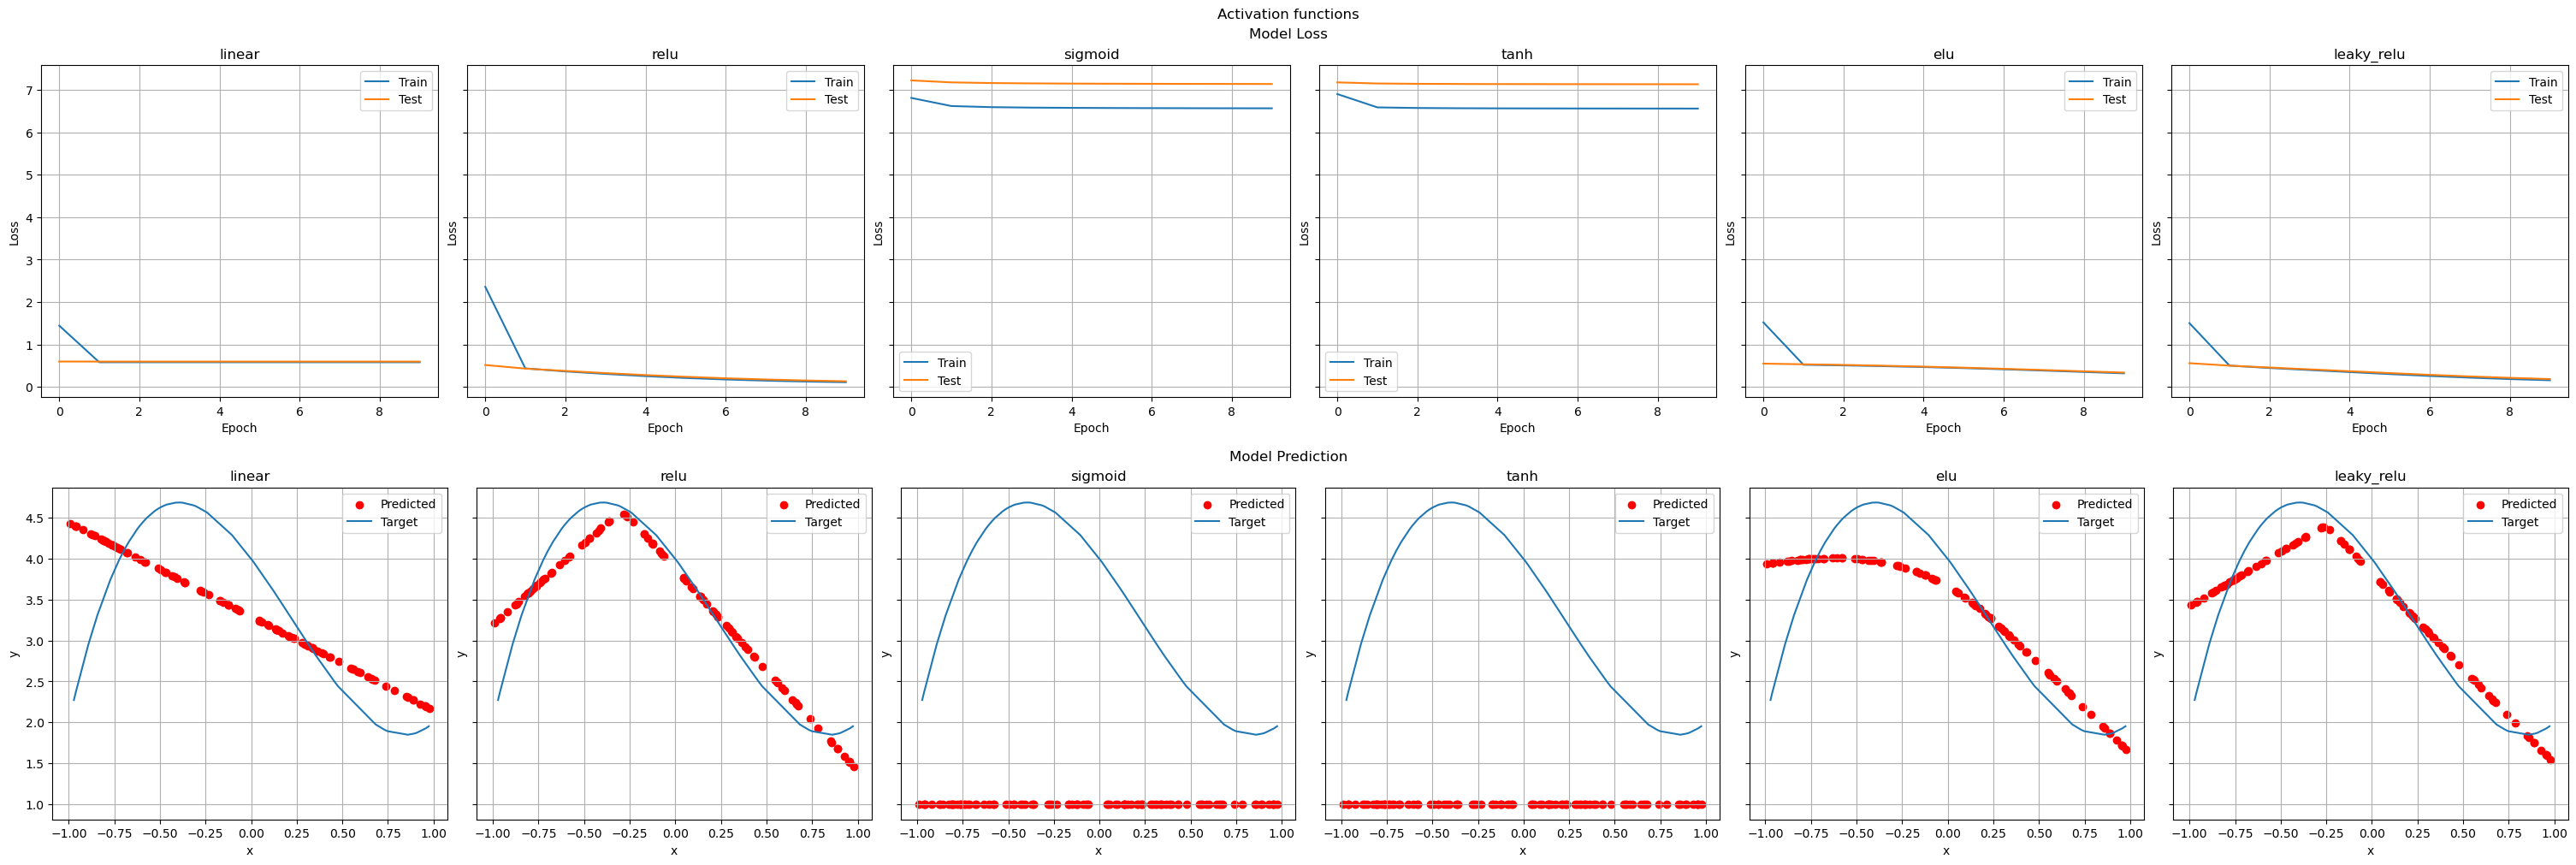

In [20]:
Activations = ['linear', 'relu', 'sigmoid', 'tanh', 'elu', 'leaky_relu']

Titles = ["Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle("Activation functions")
figure.set_size_inches(30, 10)

subfigs = figure.subfigures(nrows=2, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(Activations), sharey = 'row'))

for idx, activation in enumerate(Activations):

    model_filename = model_path + "PM_act_" + activation + ".keras"
    hist_filename = hist_path + "hist_act_" + activation + ".npy"

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [30], 'sgd', 'mse', activation, False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        PM.TrainModel()
        PM.SaveModel(model_filename, hist_filename)

    else:

        PM.LoadModel(model_filename, hist_filename)

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title(activation)
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    np.random.seed(0)  
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
    predict_ax.plot(PM.x_valid, PM.y_target, label = "Target")
    predict_ax.legend()
    predict_ax.set_title(activation)
    predict_ax.set_xlabel("x")
    predict_ax.set_ylabel("y")
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Activations)))


The best results are given by `relu` and `leaky relu`, and `secondly elu`. I tried using `relu` since it had the nicest prediction graph, but the network was really prone to dying (i.e. predictions are identically zero, https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks). I then decided to switch to `leaky_relu` which gave very similar result but never died.

Using `leaky_relu` as the activation function, I then tried changing the optimizer between `sgd`, `rmsprop`, `adam`, `adagrad`, `ftrl`, `lion`.

Loading pre-trained model...
Completed 1/6
Loading pre-trained model...
Completed 2/6
Loading pre-trained model...
Completed 3/6
Loading pre-trained model...
Completed 4/6
Loading pre-trained model...
Completed 5/6
Loading pre-trained model...
Completed 6/6


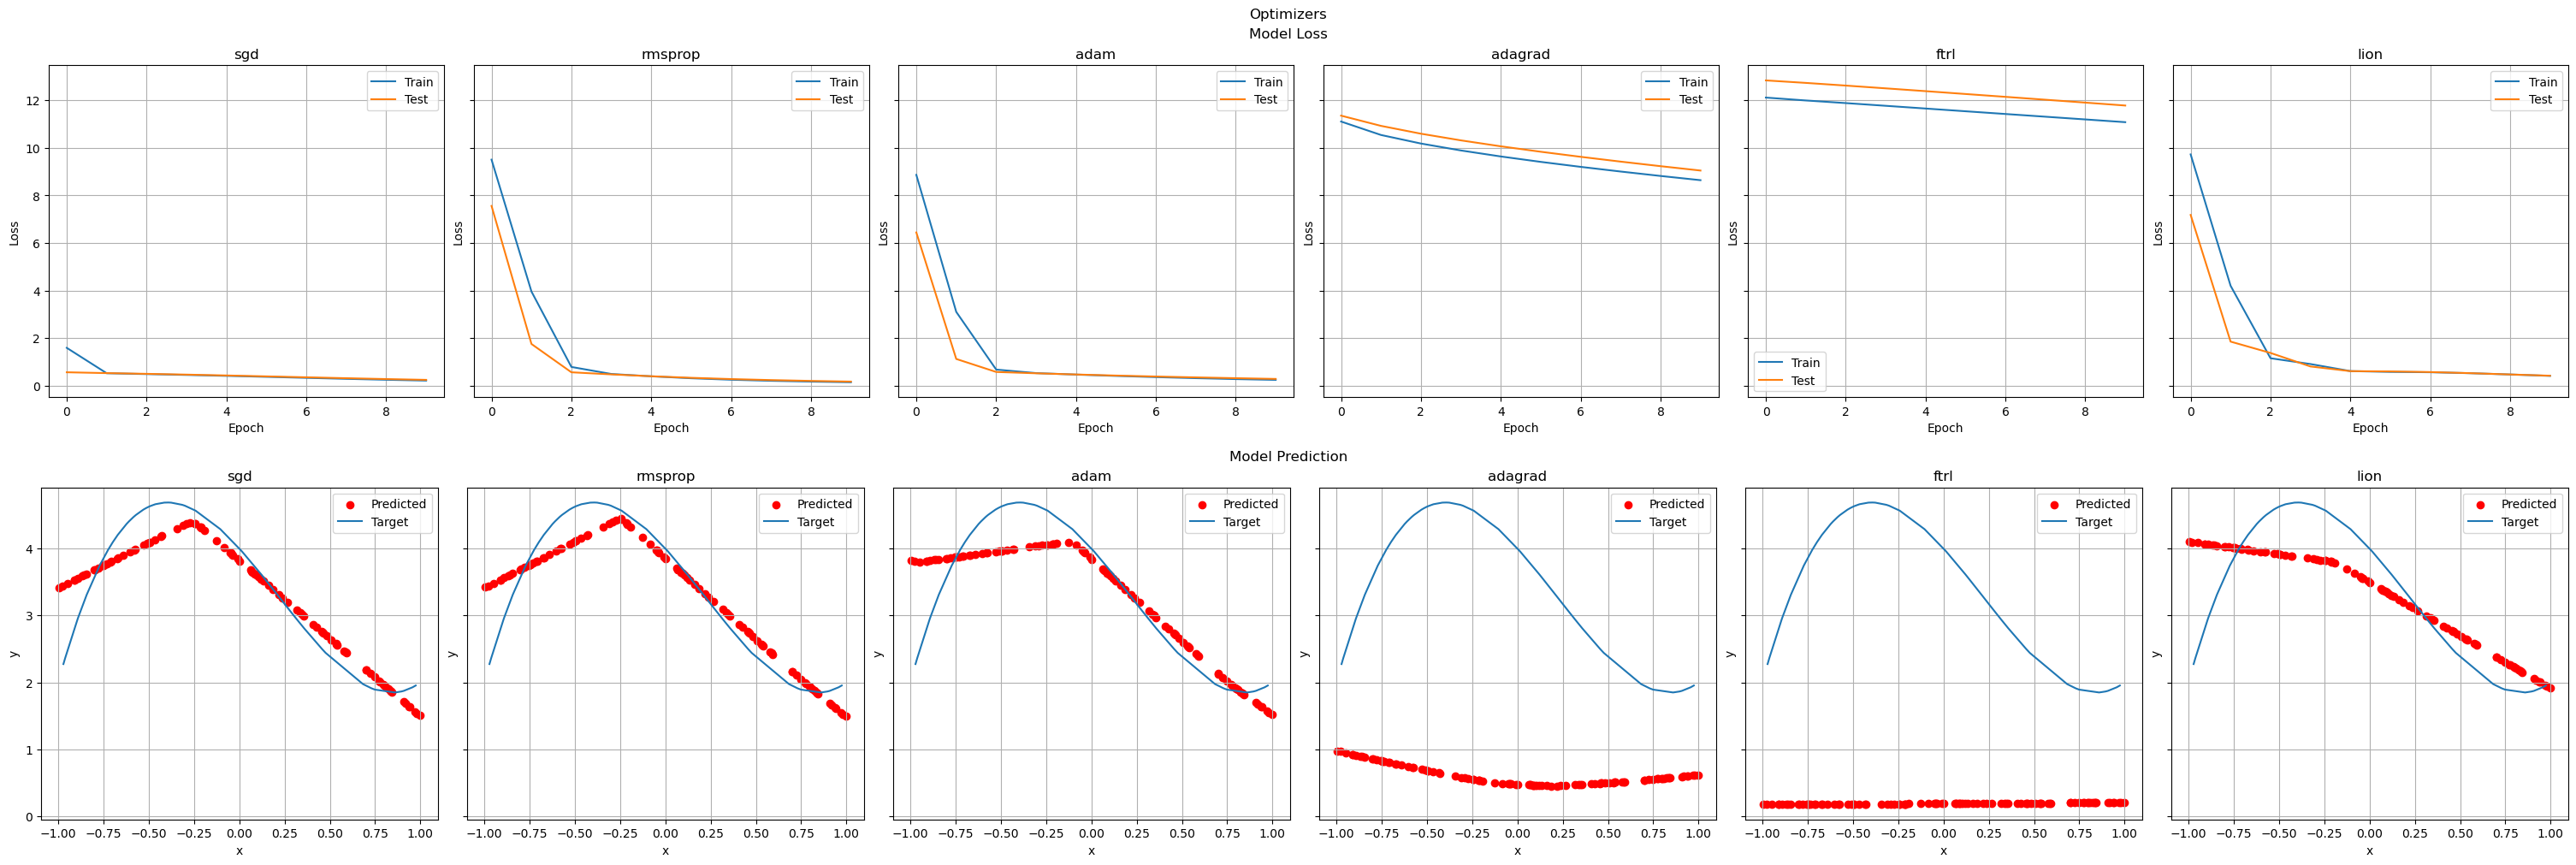

In [28]:
Optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad', 'ftrl', 'lion']

Titles = ["Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle("Optimizers")
figure.set_size_inches(30, 10)

subfigs = figure.subfigures(nrows=2, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(Optimizers), sharey = 'row'))

for idx, optimizer in enumerate(Optimizers):

    model_filename = model_path + "PM_opt_" + optimizer + ".keras"
    hist_filename = hist_path + "hist_opt_" + optimizer + ".npy"

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [30], optimizer, 'mse', 'leaky_relu', False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        PM.TrainModel()
        PM.SaveModel(model_filename, hist_filename)

    else:

        PM.LoadModel(model_filename, hist_filename)

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title(optimizer)
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
    predict_ax.plot(PM.x_valid, PM.y_target, label = "Target")
    predict_ax.set_title(optimizer)
    predict_ax.set_xlabel("x")
    predict_ax.set_ylabel("y")
    predict_ax.legend()
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Optimizers)))

We can see that `sgd`, `rmsprop`, `adam` and `lion` are the best optimizers. The overall better results are obtained with `sgd` or `rmsprop` so I decided to use `rmsprop` in the next tests.

Before changing the network structure I tested various loss functions, in particular `mse`, `mae`, `mape`, `msle`, `log_cosh` and `huber`. During this test I had to increase the number of neuron (without changing the number of layers) to $100$, otherwise some results where too bad to be interpreted.

Loading pre-trained model...
Completed 1/6
Loading pre-trained model...
Completed 2/6
Loading pre-trained model...
Completed 3/6
Loading pre-trained model...
Completed 4/6
Loading pre-trained model...
Completed 5/6
Loading pre-trained model...
Completed 6/6


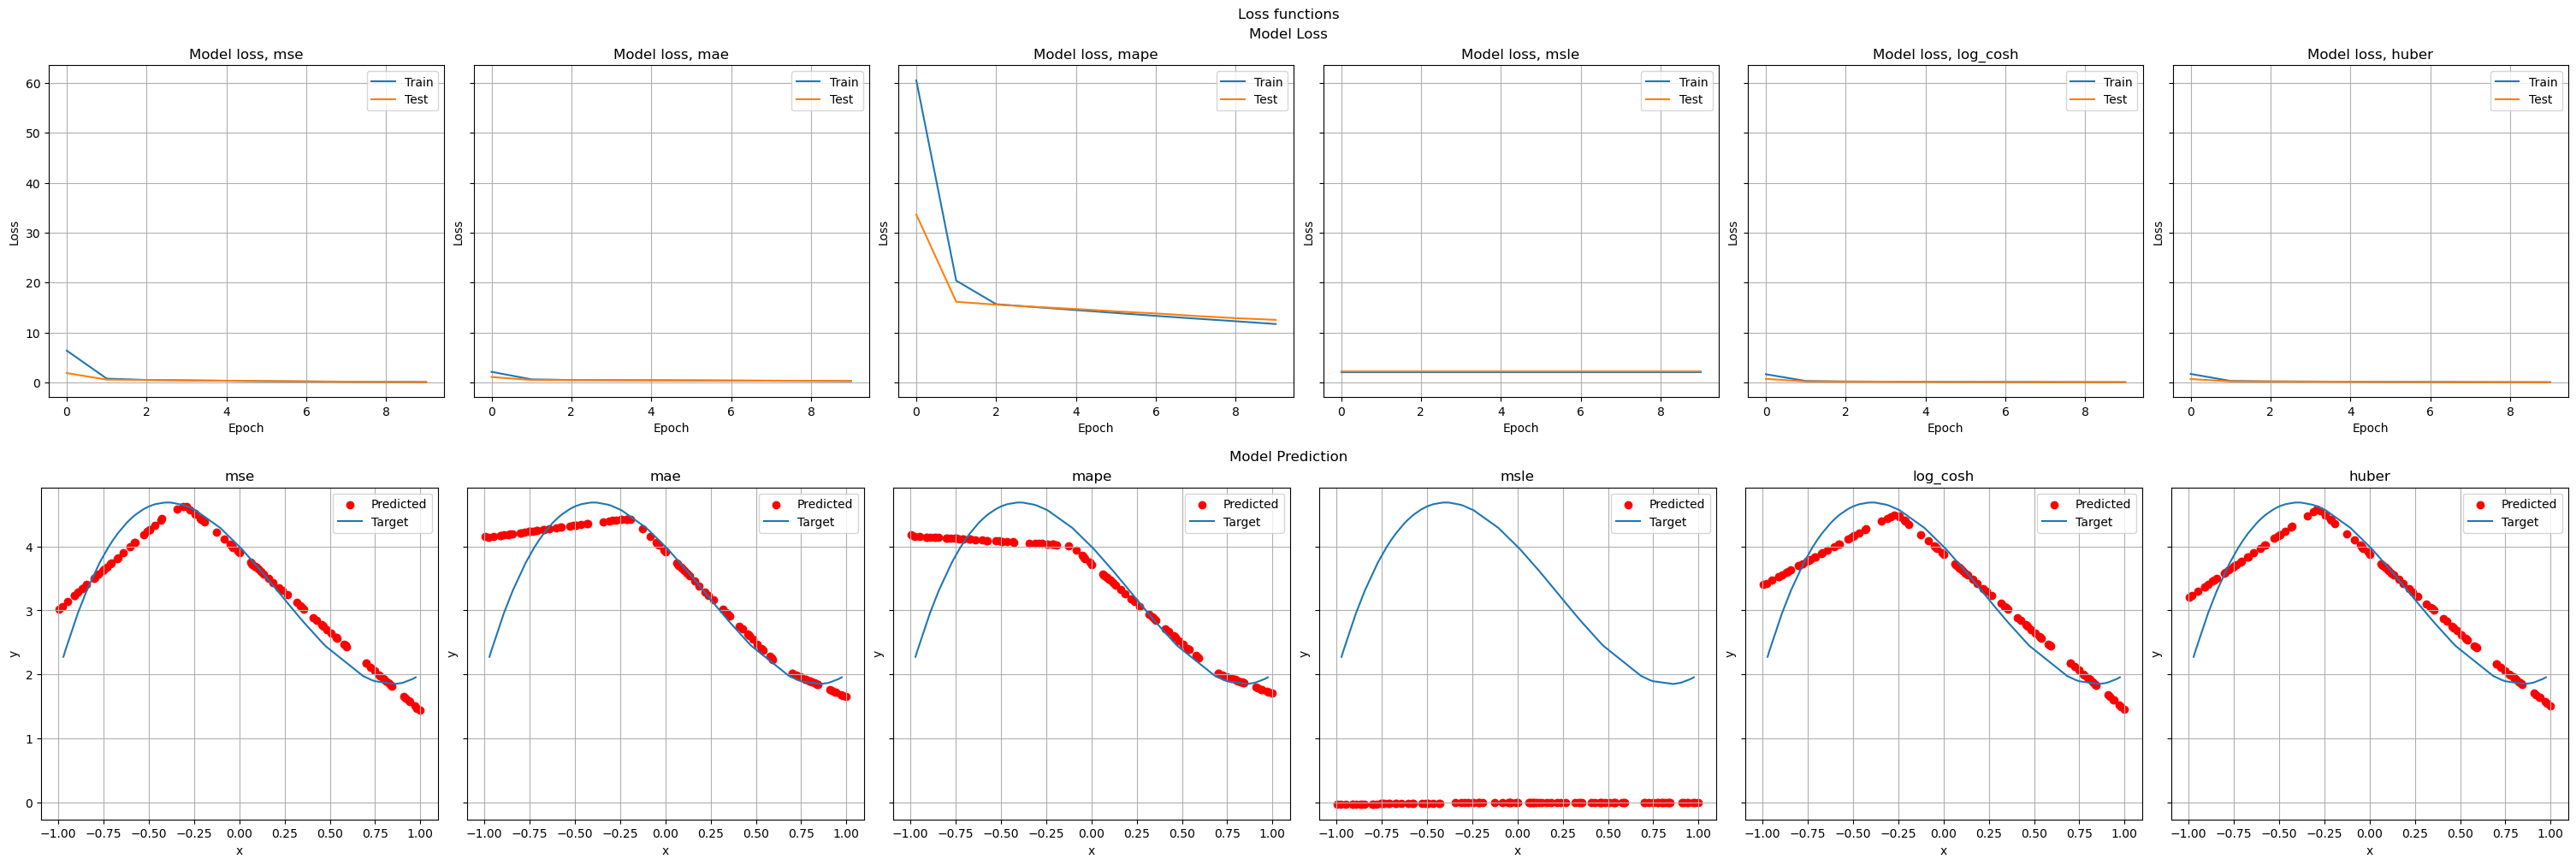

In [29]:
Losses = ['mse', 'mae', 'mape', 'msle', 'log_cosh', 'huber']

Titles = ["Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle("Loss functions")
figure.set_size_inches(30, 10)

subfigs = figure.subfigures(nrows=2, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(Losses), sharey = 'row'))

for idx, loss in enumerate(Losses):

    model_filename = model_path + "PM_loss_" + loss + ".keras"
    hist_filename = hist_path + "hist_loss_" + loss + ".npy"

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [100], 'rmsprop', loss, 'leaky_relu', False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        PM.TrainModel()
        PM.SaveModel(model_filename, hist_filename)

    else:

        PM.LoadModel(model_filename, hist_filename)

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('Model loss, {}'.format(loss))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
    predict_ax.plot(PM.x_valid, PM.y_target, label = "Target")
    predict_ax.set_title(loss)
    predict_ax.set_xlabel("x")
    predict_ax.set_ylabel("y")
    predict_ax.legend()
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Losses)))

Here we find out that all activation functions except for `msle` seems equivalent. I then chose to use `mae`, since it had the most consistent result between subsequent runs.

I can now tweak the number of layers, keeping the number of neurons ($100$) roughly constant. I tried with $1$, $2$, $3$ and $4$ total layers.

Loading pre-trained model...
Completed 1/4
Loading pre-trained model...
Completed 2/4
Loading pre-trained model...
Completed 3/4
Loading pre-trained model...
Completed 4/4


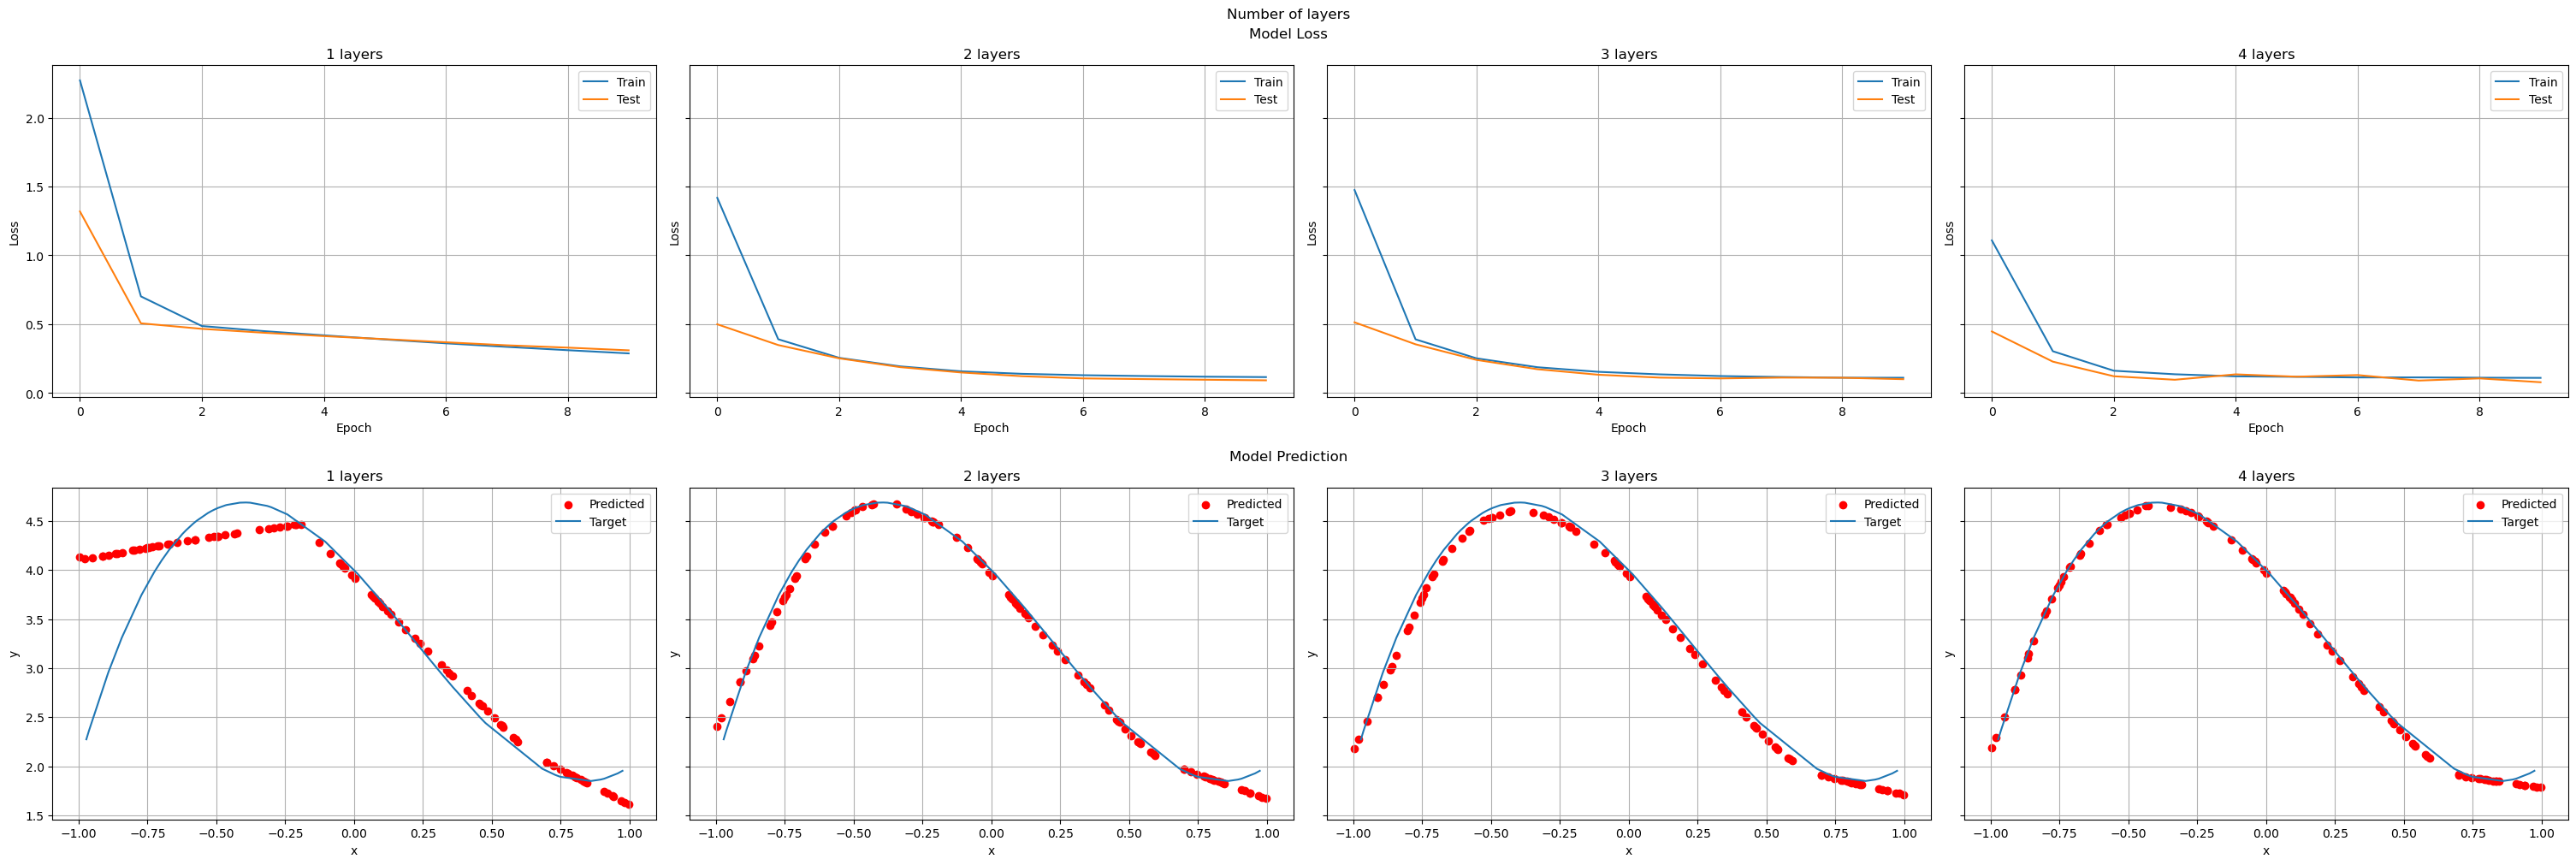

In [32]:
N_Layers = [1, 2, 3, 4]
Shapes = [[100], [50, 50], [30, 30, 30], [25, 25, 25, 25]]

Titles = ["Model Loss", "Model Prediction"]

figure = plt.figure(constrained_layout=True)
figure.suptitle("Number of layers")
figure.set_size_inches(30, 10)

subfigs = figure.subfigures(nrows=2, ncols=1)
ax = []

for idx, subfig in enumerate(subfigs):

    subfig.suptitle(Titles[idx])
    ax.append(subfig.subplots(1, len(N_Layers), sharey = 'row'))

for idx, N_Layer in enumerate(N_Layers):

    model_filename = model_path + "PM_lyr_" + str(N_Layer) + ".keras"
    hist_filename = hist_path + "hist_lyr_" + str(N_Layer) + ".npy"

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, N_Layer, Shapes[idx], 'rmsprop', 'mae', 'leaky_relu', False)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

        PM.TrainModel()
        PM.SaveModel(model_filename, hist_filename)

    else:

        PM.LoadModel(model_filename, hist_filename)

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('{} layers'.format(N_Layer))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
    predict_ax.plot(PM.x_valid, PM.y_target, label = "Target")
    predict_ax.set_title('{} layers'.format(N_Layer))
    predict_ax.set_xlabel("x")
    predict_ax.set_ylabel("y")
    predict_ax.legend()
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(N_Layers)))

By looking at the graph we can see that the best results come from a number of layer greater than $1$, with the network with $4$ layers looking best, in my opinion. As a final step I then proceeded to tweak the number of neurons per layer; I discovered that increasing the number of total neurons did not improve the result too much. Therefore I focused on $100$ total neurons and found out that the best distribution of neurons in the four layers was $(50, 20, 20, 10)$.

Once all the parameter have been tweaked, I let the network train for an higher number of epochs, $N_{Epoch}=100$. The final parameters of the network were:

- Activation `leaky_relu`
- Optimizer: `rmsprop`
- Loss: `mae`
- $N_{Neurons}=100$
- $N_{Layers}=4$
- Neurons distribution: $50,20,20,10$ 

Loading pre-trained model...


/tmp/ipykernel_17350/2356056908.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


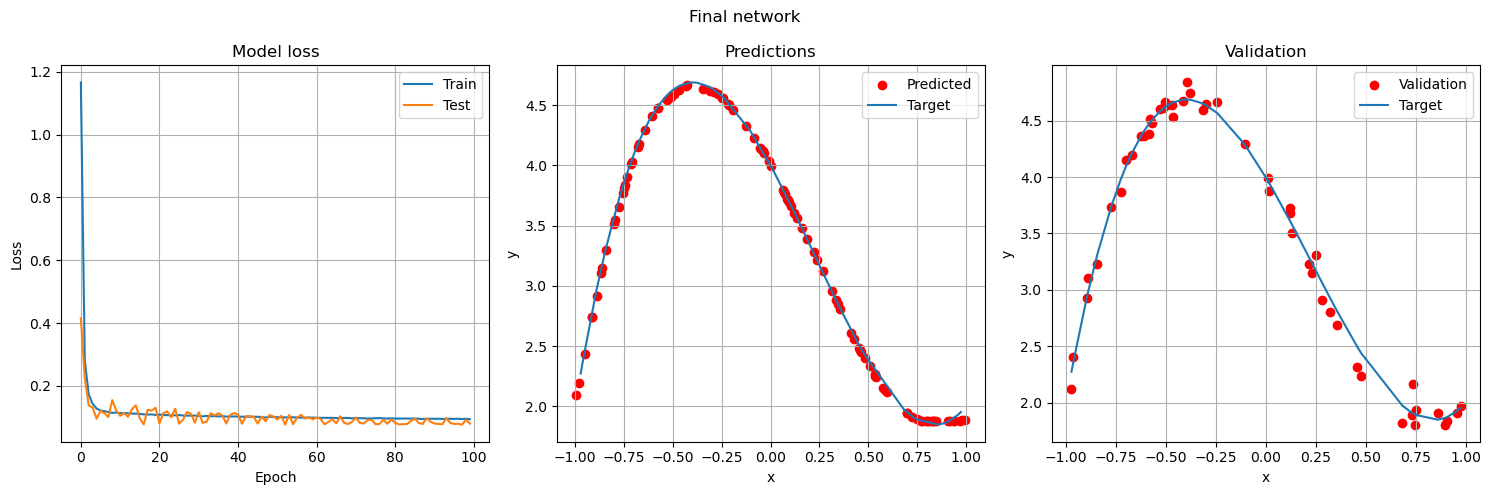

In [40]:
N_Layer = 4
Shape = [50, 20, 20, 10]        
N_Epochs_Final = 100        

figure, ax = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

model_filename = model_path + "PM_final.keras"
hist_filename = hist_path + "hist_final.npy"

PM = PolynomialModel(N_Epochs_Final, N_Train, Sigma, N_Layer, Shape, 'rmsprop', 'mae', 'leaky_relu', False)

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename))):

    PM.TrainModel()
    PM.SaveModel(model_filename, hist_filename)

else:

    PM.LoadModel(model_filename, hist_filename)

loss_ax = ax[0]
predict_ax = ax[1]
valid_ax = ax[2]

# look into training history
# Plot training & validation loss values
loss_ax.plot(PM.history.history['loss'])
loss_ax.plot(PM.history.history['val_loss'])
loss_ax.set_title('Model loss')
loss_ax.set_ylabel('Loss')
loss_ax.set_xlabel('Epoch')
loss_ax.legend(['Train', 'Test'], loc='best')
loss_ax.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
predict_ax.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
predict_ax.plot(PM.x_valid, PM.y_target, label = "Target")
predict_ax.set_title("Predictions")
predict_ax.set_xlabel("x")
predict_ax.set_ylabel("y")
predict_ax.legend()
predict_ax.grid(True)

valid_ax.scatter(PM.x_valid, PM.y_valid, c = 'r', label = "Validation")
valid_ax.plot(PM.x_valid, PM.y_target, label = "Target")
valid_ax.set_title("Validation")
valid_ax.set_xlabel("x")
valid_ax.set_ylabel("y")
valid_ax.legend()
valid_ax.grid(True)

figure.suptitle("Final network")
figure.tight_layout()
figure.show()

Lastly, I tried to use the trained network to predict points outside the training interval. I then generated some points $x_i\in[-1.5,1.5]$ and let the network predict their corresponding values $y_i$. 

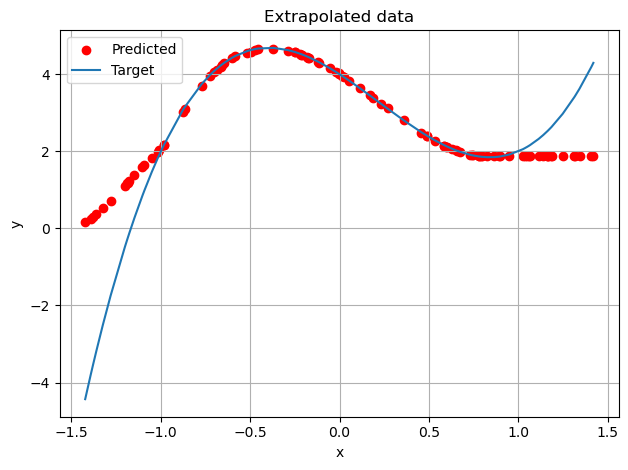

In [41]:
x_predicted = np.sort(np.random.uniform(-1.5, 1.5, 100))
y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
plt.scatter(x_predicted, y_predicted,color='r', label = "Predicted")
plt.plot(x_predicted, PM.TP(x_predicted), label = "Target")
plt.title("Extrapolated data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

As we can see, while the predictions are correct inside the train interval $[-1.0,1.0]$, they become completely wrong outside said interval.